In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 
import numpy as np

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')
all_commoditites = pd.read_csv('../data/commodity_totals.csv')

In [3]:
demo_fruitnut['Organization Type'] = demo_fruitnut['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_berries['Organization Type'] = demo_berries['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_citrus['Organization Type'] = demo_citrus['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_vegetables['Organization Type'] = demo_vegetables['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
all_commoditites['Farm Size'] = all_commoditites['Domain Category'].map(lambda x: '1.0 TO 9.9 ACRES' if '1.0 TO 9.9 ACRES' in x
                                                                              else '10.0 TO 49.9 ACRES' if '10.0 TO 49.9 ACRES' in x
                                                                              else '50.0 TO 69.9 ACRES' if '50.0 TO 69.9 ACRES' in x
                                                                              else '70.0 TO 99.9 ACRES' if '70.0 TO 99.9 ACRES' in x
                                                                              else '100 TO 139 ACRES' if '100 TO 139 ACRES' in x
                                                                              else '140 TO 179 ACRES' if '140 TO 179 ACRES' in x
                                                                              else '180 TO 219 ACRES' if '180 TO 219 ACRES' in x
                                                                              else '220 TO 259 ACRES' if '220 TO 259 ACRES' in x
                                                                              else '260 TO 499 ACRES' if '260 TO 499 ACRES' in x
                                                                              else '500 TO 999 ACRES' if '500 TO 999 ACRES' in x
                                                                              else '1,000 TO 1,999 ACRES' if '1,000 TO 1,999 ACRES' in x
                                                                              else '2,000 OR MORE ACRES' if '2,000 OR MORE ACRES' in x
                                                                              else "")
all_commoditites['Income Bracket'] = all_commoditites['Domain Category'].map(lambda x: '0-49,999' if 'LESS THAN 1,000 $' in x
                                                                              else '0-49,999' if '1,000 TO 2,499 $' in x
                                                                              else '0-49,999' if '2,500 TO 4,999 $' in x
                                                                              else '0-49,999' if '5,000 TO 9,999 $' in x
                                                                              else '0-49,999' if '10,000 TO 19,999 $' in x
                                                                              else '0-49,999' if '10,000 TO 24,999 $' in x
                                                                              else '0-49,999' if '20,000 TO 24,999 $' in x
                                                                              else '0-49,999' if '25,000 TO 39,999 $' in x
                                                                              else '0-49,999' if '25,000 TO 49,999 $' in x
                                                                              else '0-49,999' if '40,000 TO 49,999 $' in x
                                                                              else '50,000-99,999' if '50,000 TO 99,999 $' in x
                                                                              else '100,000-249,999' if '100,000 TO 249,999 $' in x
                                                                              else '250,000-499,999' if '250,000 TO 499,999 $' in x
                                                                              else '500,000 OR MORE' if '500,000 OR MORE $' in x
                                                                              #else '500,000-999,999' if '500,000 TO 999,999 $' in x
                                                                              #else '1,000,000 OR MORE' if '1,000,000 OR MORE $' in x
                                                                              #else '1,000,000-2,499,999' if '1,000,000 TO 2,499,999 $' in x
                                                                              #else '2,500,000-4,999,999' if '2,500,000 TO 4,999,999 $' in x
                                                                              else '5,000,000 OR MORE' if '5,000,000 OR MORE $' in x
                                                                              else "")

In [4]:
comm_income_by_sales = all_commoditites.loc[all_commoditites['Domain'] == 'FARM SALES']
comm_income_by_sales['Income Bracket'].unique()

array(['0-49,999', '', '100,000-249,999', '250,000-499,999',
       '5,000,000 OR MORE', '50,000-99,999', '500,000 OR MORE'],
      dtype=object)

In [5]:
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (D)']
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (Z)']
comm_income_by_sales['Value'] = comm_income_by_sales['Value'].str.replace(',', '')
comm_income_by_sales['Value'] = pd.to_numeric(comm_income_by_sales.Value, downcast='integer').fillna(0)
comm_income_by_sales = comm_income_by_sales.groupby(
                ['Year','Income Bracket']).sum(
                'Value').fillna(0).reset_index()
comm_income_by_sales_piv = comm_income_by_sales.pivot(index = 'Year', columns = 'Income Bracket', values = 'Value').reset_index()
comm_income_by_sales_piv

Income Bracket,Year,,"0-49,999","100,000-249,999","250,000-499,999","5,000,000 OR MORE","50,000-99,999","500,000 OR MORE"
0,1997,155416761000,14446907000,30406176000,31848311000,40369882000,11716046000,112962373000
1,2002,170522831000,12486273000,25401608000,28530105000,48940914000,10024295000,124204073000
2,2007,311339371000,12145834000,24212940000,33409883000,82951002000,8961255000,218490577000
3,2012,453646837000,21241374000,22822425000,33964264000,125050429000,9250546000,316691570000
4,2017,448231894000,20044721000,21171316000,31318548000,134950472000,8477635000,316260682000
5,2022,670243782000,19637566000,19715890000,30549461000,228735891000,8237216000,473614327000


In [6]:
comm_income_by_sales_piv = comm_income_by_sales_piv[['Year', 
                                                     '0-49,999', 
                                                     '50,000-99,999', 
                                                     '100,000-249,999', 
                                                     '250,000-499,999',
                                                     #'500,000-999,999',
                                                     '500,000 OR MORE',
                                                     #'1,000,000-2,499,999',
                                                     #'2,500,000-4,999,999',
                                                     #'1,000,000 OR MORE',
                                                     '5,000,000 OR MORE'
                                                     ]]
comm_income_by_sales_piv

Income Bracket,Year,"0-49,999","50,000-99,999","100,000-249,999","250,000-499,999","500,000 OR MORE","5,000,000 OR MORE"
0,1997,14446907000,11716046000,30406176000,31848311000,112962373000,40369882000
1,2002,12486273000,10024295000,25401608000,28530105000,124204073000,48940914000
2,2007,12145834000,8961255000,24212940000,33409883000,218490577000,82951002000
3,2012,21241374000,9250546000,22822425000,33964264000,316691570000,125050429000
4,2017,20044721000,8477635000,21171316000,31318548000,316260682000,134950472000
5,2022,19637566000,8237216000,19715890000,30549461000,473614327000,228735891000


C:\Users\corne\AppData\Local\Temp\ipykernel_55468\2012319726.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


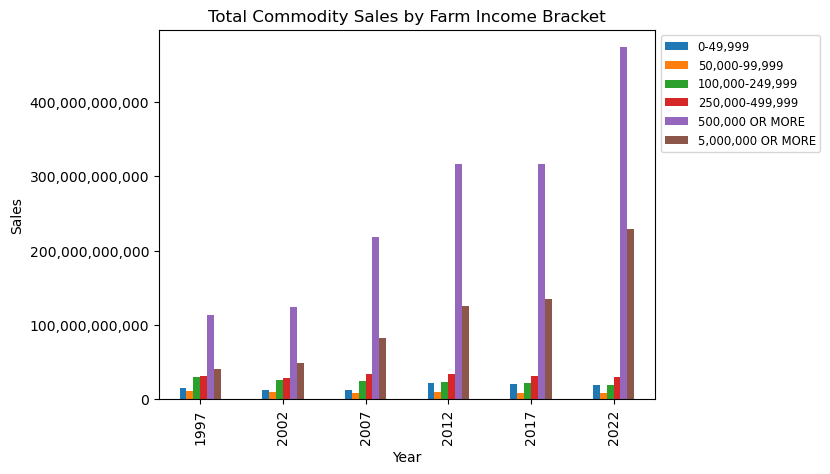

In [7]:
comm_income_by_sales_plot = comm_income_by_sales_piv.plot(x = 'Year', y = list(
    comm_income_by_sales_piv.columns[1:11]), kind = "bar", title = "Total Commodity Sales by Farm Income Bracket",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
comm_income_by_sales_plot.savefig('graphs/comm_income_by_sales_plot.png', transparent=True, bbox_inches='tight')

In [8]:
comm_income_by_size = all_commoditites.loc[all_commoditites['Domain'] == 'AREA OPERATED']
comm_income_by_size = comm_income_by_size.loc[comm_income_by_size['Value'] != ' (D)']
comm_income_by_size = comm_income_by_size.loc[comm_income_by_size['Value'] != ' (Z)']
comm_income_by_size['Value'] = comm_income_by_size['Value'].str.replace(',', '')
comm_income_by_size['Value'] = pd.to_numeric(comm_income_by_size.Value, downcast='integer').fillna(0)
comm_income_by_size = comm_income_by_size.groupby(
                ['Year','Farm Size']).sum(
                'Value').fillna(0).reset_index()
comm_income_by_size_piv = comm_income_by_size.pivot(index = 'Year', columns = 'Farm Size', values = 'Value').reset_index()
comm_income_by_size_piv = comm_income_by_size_piv[['Year',
                            '1.0 TO 9.9 ACRES' ,
                            '10.0 TO 49.9 ACRES',
                            '50.0 TO 69.9 ACRES',
                            '70.0 TO 99.9 ACRES',
                            '100 TO 139 ACRES',
                            '140 TO 179 ACRES',
                            '180 TO 219 ACRES',
                            '220 TO 259 ACRES',
                            '260 TO 499 ACRES',
                            '500 TO 999 ACRES',
                            '1,000 TO 1,999 ACRES',
                            '2,000 OR MORE ACRES']]
comm_income_by_size_piv

Farm Size,Year,1.0 TO 9.9 ACRES,10.0 TO 49.9 ACRES,50.0 TO 69.9 ACRES,70.0 TO 99.9 ACRES,100 TO 139 ACRES,140 TO 179 ACRES,180 TO 219 ACRES,220 TO 259 ACRES,260 TO 499 ACRES,500 TO 999 ACRES,"1,000 TO 1,999 ACRES","2,000 OR MORE ACRES"
0,2012,7440534000,23467130000,8295867000,11270946000,12036659000,11898914000,9539131000,9037393000,41345055000,64968508000,72422104000,122922240000
1,2017,7824714000,24879848000,8985783000,12286283000,12709110000,11658818000,10270858000,8437582000,40268401000,59700336000,68443433000,123057529000
2,2022,12319047000,37885890000,12310114000,16728969000,17647826000,16342424000,13220995000,10481235000,53035405000,79609944000,88929938000,184575378000


C:\Users\corne\AppData\Local\Temp\ipykernel_55468\2728730512.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


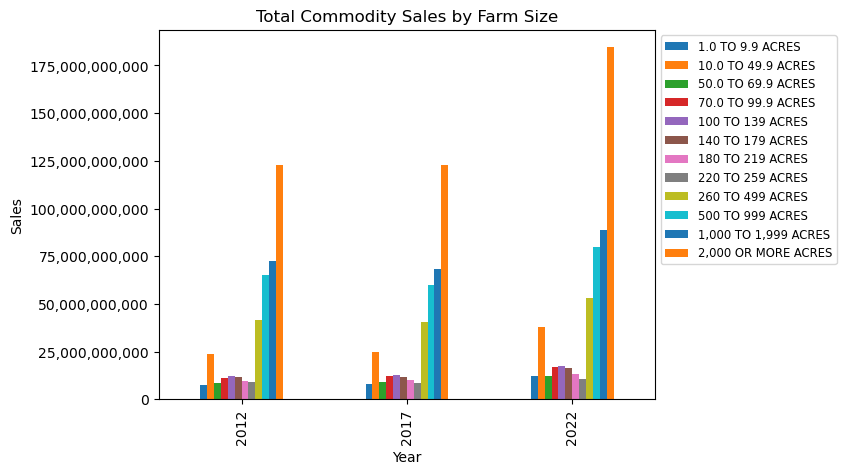

In [9]:
comm_income_by_size_plot = comm_income_by_size_piv.plot(x = 'Year', y = list(
    comm_income_by_size_piv.columns.unique()[1:13]), kind = "bar", title = "Total Commodity Sales by Farm Size",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
comm_income_by_size_plot.savefig('graphs/comm_income_by_size_plot.png', transparent=True, bbox_inches='tight')

In [10]:
vegetable_sales = demo_vegetables.loc[(demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $')
                    & (demo_vegetables['Domain'] == 'ORGANIZATION')]

In [11]:
vegetable_sales['Organization Type'].unique()

array(['Corporation', 'Family & Individual',
       'Institutional & Researach & Reservation', 'Partnership'],
      dtype=object)

C:\Users\corne\AppData\Local\Temp\ipykernel_55468\2287131662.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


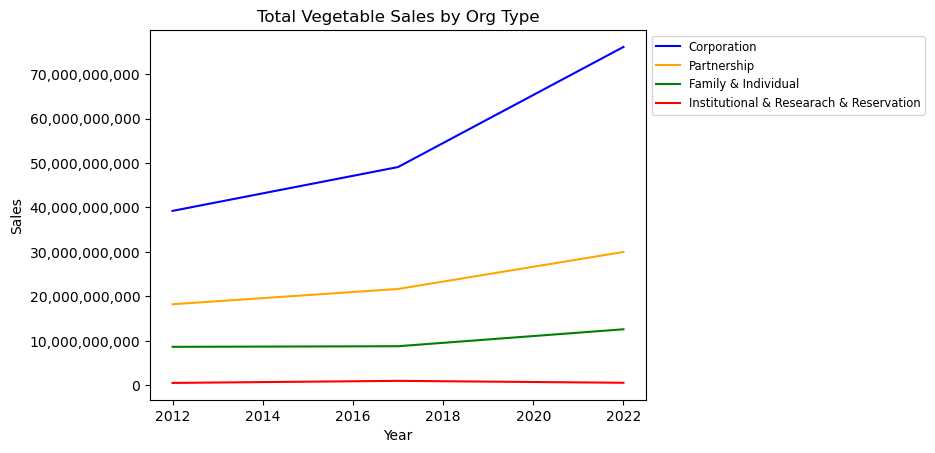

In [12]:
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (D)']
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (Z)']
vegetable_sales['Value'] = vegetable_sales['Value'].str.replace(',', '')
vegetable_sales['Value'] = pd.to_numeric(vegetable_sales.Value, downcast='integer').fillna(0)
vegetable_sales = vegetable_sales.groupby(
                ['Year','Organization Type']).sum(
                'Value').fillna(0).reset_index()
vegetable_sales_piv = vegetable_sales.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
vegetable_sales_piv = vegetable_sales_piv[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]
vegetable_sales_plot = vegetable_sales_piv.plot(x = 'Year', y = list(
    vegetable_sales_piv.columns[1:5]), kind = "line", title = "Total Vegetable Sales by Org Type",
                                                 ylabel = "Sales", color = ['blue','orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
vegetable_sales_plot.savefig('graphs/vegetable_sales_plot.png', transparent=True, bbox_inches='tight')

In [13]:
fruit_sales = demo_fruitnut.loc[(demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $')
                    & (demo_fruitnut['Domain'] == 'ORGANIZATION')]

C:\Users\corne\AppData\Local\Temp\ipykernel_55468\317060194.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])


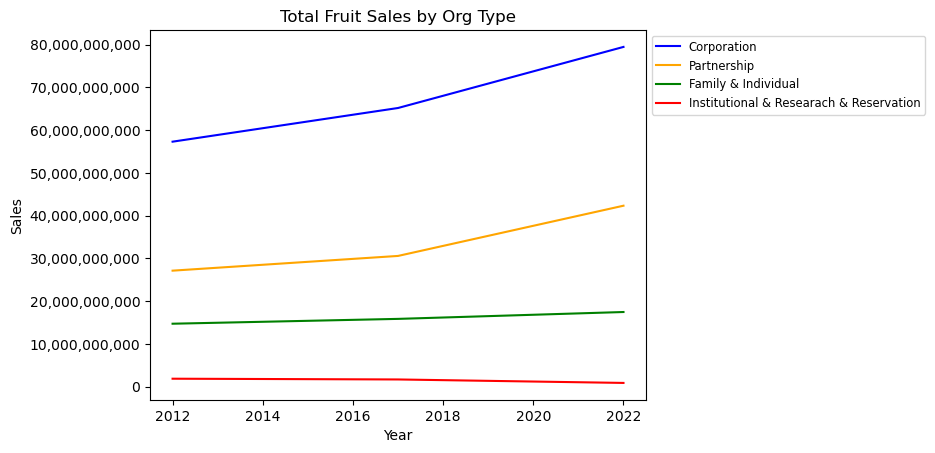

In [14]:
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (D)']
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (Z)']
fruit_sales['Value'] = fruit_sales['Value'].str.replace(',', '')
fruit_sales['Value'] = pd.to_numeric(fruit_sales.Value, downcast='integer').fillna(0)
fruit_sales = fruit_sales.groupby(
                ['Year','Organization Type']).sum(
                'Value').fillna(0).reset_index()
fruit_sales_piv = fruit_sales.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
fruit_sales_piv = fruit_sales_piv[['Year', 'Corporation', 'Partnership', 'Family & Individual', 'Institutional & Researach & Reservation']]
fruit_sales_plot = fruit_sales_piv.plot(x = 'Year', y = list(
    fruit_sales_piv.columns[1:5]), kind = "line", title = "Total Fruit Sales by Org Type",
                                                 ylabel = "Sales", color = ['blue','orange', 'green', 'red']).legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y_values])
fruit_sales_plot.savefig('graphs/fruit_sales_plot.png', transparent=True, bbox_inches='tight')